In [1]:
import matplotlib.pyplot as plt
from mlxtend.data import loadlocal_mnist
from principal_RBM_alpha import *
from principal_DBN_alpha import *
from principal_DNN_MNIST import *
from sklearn.preprocessing import OneHotEncoder
from utils import *

PATH = 'binaryalphadigs.mat'

In [4]:
chars = 'defg'
images, indices = lire_alpha_digit(PATH, chars)

On commence par le RBM: on l'entraîne puis on génère des images.

Epoch 1 out of 500, loss: 0.21116179135919927
Epoch 100 out of 500, loss: 0.005091555571694473
Epoch 200 out of 500, loss: 0.0010287141261452303
Epoch 300 out of 500, loss: 0.00042378880538542494
Epoch 400 out of 500, loss: 0.0002245503399005506
Epoch 500 out of 500, loss: 0.0001427858337412829


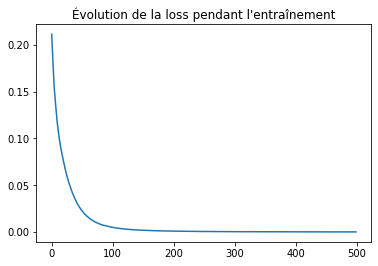

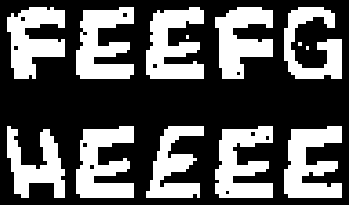

In [7]:
# Valeurs des hyper paramètres et entrainement
p = 320  #(egal à 20 * 16, la taille de l'image)
q = 250
rbm = RBM(p, q) #la taille du réseau est donc [320,250]

epochs = 500
learning_rate = 0.01
batch_size = 10

RBM_trained, loss = rbm.train_RBM(images, epochs, learning_rate, batch_size)

plt.plot(loss)
plt.title("Évolution de la loss pendant l'entraînement")
plt.show()

n_iter = 1000
n_imgs = 10
RBM_trained.generer_image_RBM(n_imgs, n_iter)

Les images générées sont bien cohérentes car semblables aux données d’apprentissage. On s'occupe maintenant du DBN:

Epoch 1 out of 2000, loss: 0.21281277530940543
Epoch 100 out of 2000, loss: 0.08518544957446826
Epoch 200 out of 2000, loss: 0.048990106950131715
Epoch 300 out of 2000, loss: 0.030131669156349003
Epoch 400 out of 2000, loss: 0.019576194229452594
Epoch 500 out of 2000, loss: 0.013101441495903234
Epoch 600 out of 2000, loss: 0.009142612734119442
Epoch 700 out of 2000, loss: 0.006590934866812437
Epoch 800 out of 2000, loss: 0.004949099648746493
Epoch 900 out of 2000, loss: 0.0037583336921817702
Epoch 1000 out of 2000, loss: 0.0029622866244954187
Epoch 1100 out of 2000, loss: 0.002386601371345799
Epoch 1200 out of 2000, loss: 0.0019783679500683135
Epoch 1300 out of 2000, loss: 0.0016441206889833543
Epoch 1400 out of 2000, loss: 0.0014013521021503759
Epoch 1500 out of 2000, loss: 0.0011952370276609482
Epoch 1600 out of 2000, loss: 0.0010342932752904614
Epoch 1700 out of 2000, loss: 0.0009062888118773957
Epoch 1800 out of 2000, loss: 0.0007955374514016174
Epoch 1900 out of 2000, loss: 0.0007

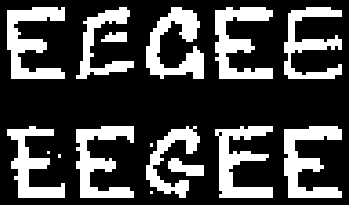

In [6]:
neurons = [images[0, :].shape[0], 200, 150, 100] #taille du réseau
dbn = DBN(neurons)
dbn, losses = dbn.pretrain_DBN(images, n_epoch=2000, lr_rate=0.001)
generated = dbn.generer_image_DBN(n_imgs, n_iter=n_iter)

A nouveau, les images générées sont cohérentes car semblables aux données d’apprentissage. On peut donc maintenant réaliser l'étude sur MNIST.